# Homework 1

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('titanic.csv.gz', compression='gzip', header=0, sep=',')

# What do you notice about the data

* 'PassengerID' is unique (and ordered) for all indiiduals, and can thus be used as an index or removed altogether
* Other column names are less-than-straightforward - e.g. 'Embarked', 'Parch', 'SibSp'
* 'Embarked' has an 'nan' value for some passengers
* Passengers paid a wide range of different fares, far exceeding the range of accomodations.

In [123]:
print "The 'survived' variable has possible values %r and %r." % (
    df.Survived.unique()[0], df.Survived.unique()[1])
print "The 'Pclass' variable has possible values %r, %r and %r." % (
    df.Pclass.unique()[0], df.Pclass.unique()[1], df.Pclass.unique()[2])
print "The 'Sex' variable has possible values %r and %r." % (
    df.Sex.unique()[0], df.Sex.unique()[1])
print "The 'SibSp' variable has %d possible values: %r, %r, %r, %r, %r, %r and %r." % (
    len(df.SibSp.unique()), df.SibSp.unique()[0], df.SibSp.unique()[1], df.SibSp.unique()[2], 
    df.SibSp.unique()[3], df.SibSp.unique()[4], df.SibSp.unique()[5], df.SibSp.unique()[6])
print "The 'Parch' variable also has %d possible values: %r, %r, %r, %r, %r, %r and %r." % (
    len(df.Parch.unique()), df.Parch.unique()[0], df.Parch.unique()[1], df.Parch.unique()[2], 
    df.Parch.unique()[3], df.Parch.unique()[4], df.Parch.unique()[5], df.Parch.unique()[6])
print "The 'Embarked' variable has %d possible values: %r, %r, %r and %r. \n" % (
    len(df.Embarked.unique()), df.Embarked.unique()[0], df.Embarked.unique()[1], 
    df.Embarked.unique()[2], df.Embarked.unique()[3])
print "Otherwise, the other column headers 'Name', 'Age', 'Fare' and 'Cabin' have", \
      "%d, %d, %d and %d possible values respectively." % ( 
    len(df.Name.unique()), len(df.Age.unique()), len(df.Fare.unique()), len(df.Cabin.unique()))

The 'survived' variable has possible values 0 and 1.
The 'Pclass' variable has possible values 3, 1 and 2.
The 'Sex' variable has possible values 'male' and 'female'.
The 'SibSp' variable has 7 possible values: 1, 0, 3, 4, 2, 5 and 8.
The 'Parch' variable also has 7 possible values: 0, 1, 2, 5, 3, 4 and 6.
The 'Embarked' variable has 4 possible values: 'S', 'C', 'Q' and nan. 

Otherwise, the other column headers 'Name', 'Age', 'Fare' and 'Cabin' have 891, 89, 248 and 148 possible values respectively.


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

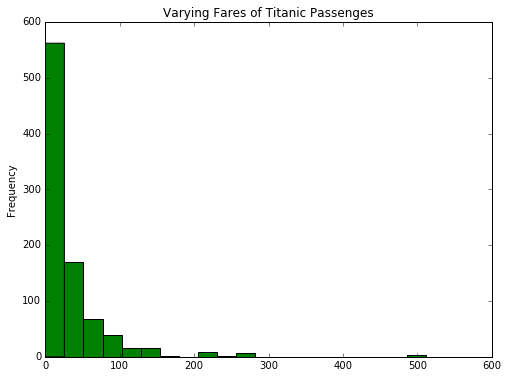

In [124]:
plt.figure(2, figsize=(8,6))
df.Fare.plot(kind='hist', color='green', bins=20,title='Varying Fares of Titanic Passenges')

df.Fare.describe()

# What is the overall survival rate

In [125]:
perc_surv_all = float(sum(df.Survived))/len(df.Survived)*100
print "The probability of survival for Titanic passengers at large was %.2f%%." % perc_surv_all

The probability of survival for Titanic passengers at large was 38.38%.


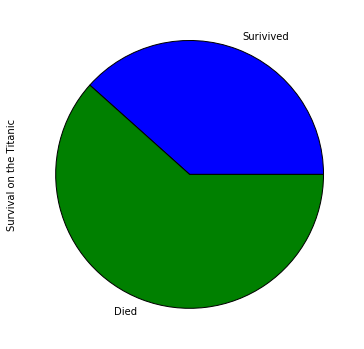

In [126]:
# Pie chart for survival rate
perc_series = pd.Series((perc_surv_all, 100-perc_surv_all), 
                        index = ['Surivived', 'Died'], name = 'Survival on the Titanic')
perc_series.plot(kind = 'pie', figsize = (6, 6))

# What role does gender play in surviving?

In the dataset, there are 577 men and 314 women.
Out of the 577 men 109 survived, while out of the 314 women 233 survived.

This shows survival rates of 18.89% for men and 74.20% for women respectively, while
the probability of survival irregardless of sex is 38.38%, as shown above.


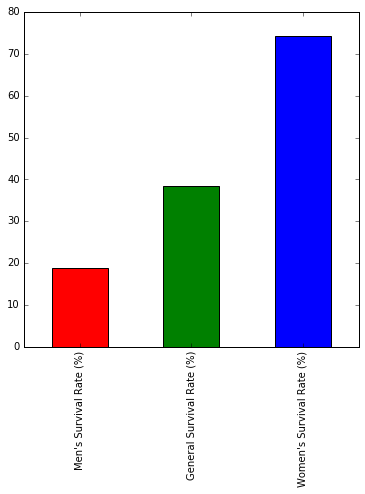

In [127]:
print "In the dataset, there are %d men and %d women." % (len(df.Sex[df.Sex=='male']), len(df.Sex[df.Sex=='female']))
print 'Out of the %d men %d survived, while out of the %d women %d survived.' % (
    len(df.Sex[df.Sex=='male']), sum(df.Survived[df.Sex=='male']), 
    len(df.Sex[df.Sex=='female']), sum(df.Survived[df.Sex=='female']))

men_survive_rate = float(sum(df.Survived[df.Sex=='male']))/len(df.Sex[df.Sex=='male']) * 100
women_survive_rate = float(sum(df.Survived[df.Sex=='female']))/len(df.Sex[df.Sex=='female']) * 100
perc_surv_all = float(sum(df.Survived))/len(df.Survived)*100

print '\nThis shows survival rates of %.2f%% for men and %.2f%% for women respectively, while' % (
    men_survive_rate, women_survive_rate)
print "the probability of survival irregardless of sex is %.2f%%, as shown above." % perc_surv_all

# Pie chart for survival rate
perc_series = pd.Series((men_survive_rate, perc_surv_all, women_survive_rate), 
                        index = ["Men's Survival Rate (%)", "General Survival Rate (%)", "Women's Survival Rate (%)"],
                        name = 'Survival on the Titanic by Sex')
perc_series.plot(kind = 'bar', figsize = (6, 6), color = 'rgb')

In [128]:
print "\nFrom this data we might infer that being a woman increases one's chance of survival." ,\
      "\nLet's look at this a little further using 'Sex' as a dummy variable in a regression.\n"


From this data we might infer that being a woman increases one's chance of survival. 
Let's look at this a little further using 'Sex' as a dummy variable in a regression.



In [129]:
# make copy of the data to change variables
data = df.copy()

# import the scikit-learn linear regression package
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
y = data.Survived

# Create binary dummy variable for independent variable 'Sex'
data['Gender'] = data.Sex.map({'male':0, 'female':1})
used_col = ['Gender']
X = data[used_col]
lm.fit(X, y)

# pair the feature names with coefficients
print "The results of a regression using 'Sex' as a dummy variable are below:"
print zip(('Intercept', used_col), (lm.intercept_, lm.coef_))
print "The R-squared of the regression is %.3f." % lm.score(X, y)

print "\nThese values affirm the survival rates of men and women shown above, but do not\n", \
      "necessarily lead one to reject a null hypothesis that sex does not impact likelihood\n", \
      "of surival."

The results of a regression using 'Sex' as a dummy variable are below:
[('Intercept', 0.18890814558058774), (['Gender'], array([ 0.55313007]))]
The R-squared of the regression is 0.295.

These values affirm the survival rates of men and women shown above, but do not
necessarily lead one to reject a null hypothesis that sex does not impact likelihood
of surival.


# What role does class play in surviving?

I'll approach this problem similarly to the question of sex.
In the dataset, there are 216 people in 1st class, 184 people in 2nd class and 491 in 3rd class.
Of the 216 passengers in 1st class, 184 in 2nd class and 491 in 3rd,
136 in 1st class surived, 87 in 2nd class survied and 119 in 3rd class survived.

This shows survival rates of 62.96%, 47.28% and 24.24% for 1st, 2nd and 3rd class respectively,
which appears to be a reasonably transparent linear relationship, though I will explore this further.
Again, let's look at this problem using class as a dummy variable.

Plot #1 - Class Survival Percentage vs. Average


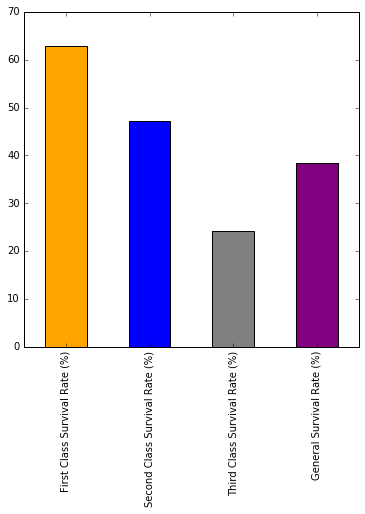

In [131]:
print "I'll approach this problem similarly to the question of sex."
print "In the dataset, there are %d people in 1st class, %d people in 2nd class and %d in 3rd class." % (
        len(df.Pclass[df.Pclass==1]), len(df.Pclass[df.Pclass==2]), len(df.Pclass[df.Pclass==3]))
print "Of the %d passengers in 1st class, %d in 2nd class and %d in 3rd," % (
    len(df.Pclass[df.Pclass==1]), len(df.Pclass[df.Pclass==2]), len(df.Pclass[df.Pclass==3])) 
print "%d in 1st class surived, %d in 2nd class survied and %d in 3rd class survived." % (
    sum(df.Survived[df.Pclass==1]), sum(df.Survived[df.Pclass==2]), sum(df.Survived[df.Pclass==3]))

survive_first = float(sum(df.Survived[df.Pclass==1]))/len(df.Pclass[df.Pclass==1]) * 100
survive_second = float(sum(df.Survived[df.Pclass==2]))/len(df.Pclass[df.Pclass==2]) * 100
survive_third = float(sum(df.Survived[df.Pclass==3]))/len(df.Pclass[df.Pclass==3]) * 100

print "\nThis shows survival rates of %.2f%%, %.2f%% and %.2f%% for 1st, 2nd and 3rd class respectively," % (
    survive_first, survive_second, survive_third)
print "which appears to be a reasonably transparent linear relationship, though I will explore this further."
print "Again, let's look at this problem using class as a dummy variable."

# Bar chart for survival rate
print "\nPlot #1 - Class Survival Percentage vs. Average"
perc_series = pd.Series((survive_first, survive_second, survive_third, perc_surv_all), 
                        index = ["First Class Survival Rate (%)", "Second Class Survival Rate (%)", 
                                 "Third Class Survival Rate (%)", "General Survival Rate (%)"],
                        name = 'Survival on the Titanic by Sex')

perc_series.plot(kind = 'bar', figsize = (6, 6), color = ['orange', 'blue', 'gray', 'purple'])

Plot #2 - Class Survival Percentage vs. Average


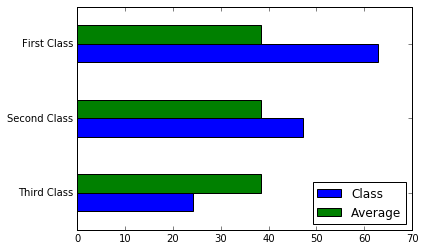

In [132]:
print "Plot #2 - Class Survival Percentage vs. Average"

bar_series1 = pd.Series((survive_third, survive_second, survive_first))
bar_series2 = pd.Series([perc_surv_all]*3)
combo_df = pd.DataFrame(zip(bar_series1, bar_series2),
                        index = ['Third Class','Second Class', 'First Class'],
                        columns = ['Class','Average'])

combo_df.plot(kind='barh')

In [133]:
# Create 2 binary dummy variables for the 3 levels of Pclass
data = df.copy()
class_dummies = pd.get_dummies(data.Pclass, prefix = 'Pclass').iloc[:, 1:]
data = pd.concat([data, class_dummies], axis=1)

# Define columns to be used in regression, here the two Pclass dummy variables
used_col = ['Pclass_2', 'Pclass_3']
X = data[used_col]

# instantiate fit
lm.fit(X, y)

# pair the feature names with coefficients
print "The results of a regression using the 'Pclass' dummy variables are below:"
print 'Intercept = %.3f' % lm.intercept_
print 'Pclass_2 = %.3f' % lm.coef_[0]
print 'Pclass_3 = %.3f' % lm.coef_[1]
print "The R-squared of the regression is %.3f." % lm.score(X, y)
print "\nThis shows that passengers realized significantly reduced chances of survival at descending levels of class."
print "Again, this affirms the probabilities seen above, but with a low R-squared, suggesting poor model fit."

The results of a regression using the 'Pclass' dummy variables are below:
Intercept = 0.630
Pclass_2 = -0.157
Pclass_3 = -0.387
The R-squared of the regression is 0.115.

This shows that passengers realized significantly reduced chances of survival at descending levels of class.
Again, this affirms the probabilities seen above, but with a low R-squared, suggesting poor model fit.


# What role does age play in surviving?

In [134]:
print "First observe the summary statistics of the age variable in the dataset:\n"
print df.Age.describe()
print "\nWe observe a distribution comprised of %d observations, with a minimum of %.2f and a" % (df.Age.count(), df.Age.min())
print "and a max of %.2f." % df.Age.max()

First observe the summary statistics of the age variable in the dataset:

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We observe a distribution comprised of 714 observations, with a minimum of 0.42 and a
and a max of 80.00.


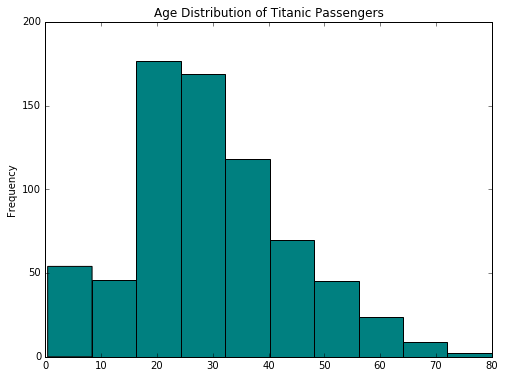

In [135]:
plt.figure(1, figsize=(8,6))
df.Age.plot(kind='hist', ylim=(0,200),
            color='teal', title = 'Age Distribution of Titanic Passengers')

In [136]:
print "\nTo approach this question further, I will break individuals into decade quantiles."
print "We thus have %d people between 0 and 10, %d people between 10 and 20, %d people between 20 and 30," % (
    len(df.Age[(df.Age >= 0) & (df.Age < 10)]), len(df.Age[(df.Age >= 10) & (df.Age < 20)]), 
    len(df.Age[(df.Age >= 20) & (df.Age < 30)]))
print "%d people between 30 and 40, %d people between 40 and 50, %d people between 50 and 60, %d people between 60 and 70," % (
    len(df.Age[(df.Age >= 30) & (df.Age < 40)]), len(df.Age[(df.Age >= 40) & (df.Age < 50)]), 
    len(df.Age[(df.Age >= 50) & (df.Age < 60)]), len(df.Age[(df.Age >= 60) & (df.Age < 70)]))
print "and %d people between 70 and 80, including 80 for a total of %d people, as seen above in the summary statistics." % (
    len(df.Age[(df.Age >= 70) & (df.Age <= 80)]), len(df.Age[df.Age <= 80]))


To approach this question further, I will break individuals into decade quantiles.
We thus have 62 people between 0 and 10, 102 people between 10 and 20, 220 people between 20 and 30,
167 people between 30 and 40, 89 people between 40 and 50, 48 people between 50 and 60, 19 people between 60 and 70,
and 7 people between 70 and 80, including 80 for a total of 714 people, as seen above in the summary statistics.


In [137]:
surv_perc_less_10 = float(sum(df.Survived[(df.Age >= 0) & (df.Age < 10)]))/len(df.Age[(df.Age >= 0) & (df.Age < 10)]) *100
surv_perc_10_20 = float(sum(df.Survived[(df.Age >= 10) & (df.Age < 20)]))/len(df.Age[(df.Age >= 10) & (df.Age < 20)]) *100
surv_perc_20_30 = float(sum(df.Survived[(df.Age >= 20) & (df.Age < 30)]))/len(df.Age[(df.Age >= 20) & (df.Age < 30)]) *100
surv_perc_30_40 = float(sum(df.Survived[(df.Age >= 30) & (df.Age < 40)]))/len(df.Age[(df.Age >= 30) & (df.Age < 40)]) *100
surv_perc_40_50 = float(sum(df.Survived[(df.Age >= 40) & (df.Age < 50)]))/len(df.Age[(df.Age >= 40) & (df.Age < 50)]) *100
surv_perc_50_60 = float(sum(df.Survived[(df.Age >= 50) & (df.Age < 60)]))/len(df.Age[(df.Age >= 50) & (df.Age < 60)]) *100
surv_perc_60_70 = float(sum(df.Survived[(df.Age >= 60) & (df.Age < 70)]))/len(df.Age[(df.Age >= 60) & (df.Age < 70)]) *100
surv_perc_more_70 = float(sum(df.Survived[(df.Age >= 70)]))/len(df.Age[(df.Age >= 70)]) *100

print "Survival for the age cohorts was as follows:\n\n 0 - 10: %.2f%% \n10 - 20: %.2f%% \n20 - 30: %.2f%% \n30 - 40: %.2f%% \n40 - 50: %.2f%% \n50 - 60: %.2f%% \n60 - 70: %.2f%% \n60 - 70: %.2f%%" % (
    surv_perc_less_10, surv_perc_10_20, surv_perc_20_30, surv_perc_30_40,
    surv_perc_40_50, surv_perc_50_60, surv_perc_60_70, surv_perc_more_70)
print "\nThis seems to suggest that being in the youngest or oldest quantile was a significant determinant of survival \n", \
      "on the Titanic, while those between 10 and 70 had roughly similar probabilities of survival."

Survival for the age cohorts was as follows:

 0 - 10: 61.29% 
10 - 20: 40.20% 
20 - 30: 35.00% 
30 - 40: 43.71% 
40 - 50: 38.20% 
50 - 60: 41.67% 
60 - 70: 31.58% 
60 - 70: 14.29%

This seems to suggest that being in the youngest or oldest quantile was a significant determinant of survival 
on the Titanic, while those between 10 and 70 had roughly similar probabilities of survival.


# Given the above, do you have any guesses on what predicts survival?

In [314]:
print "Observing the three key variables gender, class and age in terms of their predictive ability \n", \
      "on survival outcomes, it seems that survival can best be expected for females in the youngest\n", \
      "age cohort (<10) who were 1st class passengers aboard the Titanic."

Observing the three key variables gender, class and age in terms of their predictive ability 
on survival outcomes, it seems that survival can best be expected for females in the youngest
age cohort (<10) who were 1st class passengers aboard the Titanic.


# Do you have any ideas for new features?

In [145]:
print "Some possible improvements to the data include:\n"
print "\t- Grouped data for indiduals, where individuals have attributes 'Age', 'Sex', and 'Pclass'"
print "\t- Data could used more usable dummy variables, as I added for regression on the key variables analyzed"

Some possible improvements to the data include:

	- Grouped data for indiduals, where individuals have attributes 'Age', 'Sex', and 'Pclass'
	- Data could used more usable dummy variables, as I added for regression on the key variables analyzed
